# Polymorphism OOP

In [15]:
len([1, 2, 3])

3

In [16]:
len((1,2,3))

3

In [17]:
len({1,4,1}) #set give unique values

2

In [18]:
len("hello")

5

In [19]:
2+3

5

In [20]:
"2"+"3"

'23'

In [21]:
"2"+ 3 #different types does not work

TypeError: can only concatenate str (not "int") to str

In [ ]:
2*5 

10

In [ ]:
"2"*5 #str * int =repetition

'22222'

In [ ]:
"2"*5.2

TypeError: can't multiply sequence by non-int of type 'float'

## Polymorphism in class methods

In [ ]:
class Fish:
    def __init__(self, name):
        self.name=name

    def __str__(self):
        return f"I am a fish, with name {self.name}"

    def speak(self):
        print("blupp blupp blupp")

class Fox:
    def __init__(self, name):
        self.name=name

    def __str__(self):
        return f"I am a fox, with name {self.name}, no one knows how I sound"

    def speak(self):
        NotImplemented

animals = (Fish("Pelle"), Fox("Ylvis"))

for animal in animals:
    print(animal)
    animal.speak()

I am a fish, with name Pelle
blupp blupp blupp
I am a fox, with name Ylvis, no one knows how I sound


## Operator overloading

| Operator           | Dunder Method |
| ------------------ | ----------- |
| +            |\_\_add\_\_(self, other)             |
| -            |\_\_sub\_\_(self, other)             |
| *            |\_\_mul\_\_(self, other)             |
| /            |\_\_div\_\_(self, other)             |
| //           |\_\_floordiv\_\_(self, other)             |
| %            |\_\_mod\_\_(self, other)             |
| **           |\_\_pow\_\_(self, other)             |
| <            |\_\_lt\_\_(self, other)             |
| <=           |\_\_le\_\_(self, other)             |
| >            |\_\_gt\_\_(self, other)             |
| >=           |\_\_ge\_\_(self, other)             |
| ==           |\_\_eq\_\_(self, other)             |

 in order to operator overload we need to implement their dunder method

In [24]:
import matplotlib.pyplot as plt

class Vector:
    def __init__(self, *numbers: float) -> None: #*args come in as a tuple
        for number in numbers:
            if not isinstance(number, (float,int)):
                raise TypeError(f"{number} is not a valid number in a vector")

        if not len(numbers): 
            raise ValueError("-vectors can't be empty") 

        self._numbers = tuple(float(number) for number in numbers)

v1 = Vector(1,2,3)
v1

In [ ]:
v1._numbers #we should not do this

(1.0, 2.0, 3.0)

In [ ]:
class Vector:
    def __init__(self, *numbers: float) -> None: #*args come in as a tuple
        for number in numbers:
            if not isinstance(number, (float,int)):
                raise TypeError(f"{number} is not a valid number in a vector")

        if not len(numbers): 
            raise ValueError("-vectors can't be empty") 

        self._numbers = tuple(float(number) for number in numbers)

    @property
    def numbers(self) -> tuple:
        return self._numbers

v2 = Vector(2,4,5)
v2.numbers

(2.0, 4.0, 5.0)

In [29]:
try:
    v2.numbers = (1,2)
except AttributeError as err:
    print(err)

property 'numbers' of 'Vector' object has no setter


In [53]:
class Vector:
    def __init__(self, *numbers: float) -> None: #*args come in as a tuple
        for number in numbers:
            if not isinstance(number, (float,int)):
                raise TypeError(f"{number} is not a valid number in a vector")

        if not len(numbers): 
            raise ValueError("Vectors can't be empty") 

        self._numbers = tuple(float(number) for number in numbers)

    @property
    def numbers(self) -> tuple:
        return self._numbers

    def __add__(self, other: Vector) -> Vector:
        if self.validate_vectors(other):
            numbers = (num1 + num2 for num1, num2 in zip(self.numbers, other.numbers))
            return Vector(*numbers)


    def __sub__(self, other: Vector) -> Vector:
        if self.validate_vectors(other):
            numbers = (num1 - num2 for num1, num2 in zip(self.numbers, other.numbers))
            return Vector(*numbers)
    
    def __mul__(self, value: int | float) -> Vector:
        if not isinstance(value, (int, float)):
            raise TypeError (f"The value for multiplication must be int or float, not {type(value)}")

        numbers = (value*number for number in self.numbers)
        return Vector(*numbers)


    def validate_vectors(self, other: Vector) -> bool:
        if not isinstance(other, Vector) or len(other) != len(self):
            raise TypeError(f"Both must be Vector and have the same length")
        return len(self) == len(other)

    def __len__(self) -> int:
        return len(self.numbers)


    def __repr__(self) -> str:
        return f"Vector {self.numbers}"

    def __getitem__(self, item) -> float:
        return self.numbers[item]


v1 = Vector(1,2,3)
v2 = Vector(2,4,5)

v3 = v1 - v2

v3, len(v3), v3[0], v3[-1]

(Vector (-1.0, -2.0, -2.0), 3, -1.0, -2.0)

In [37]:
v4 = Vector(1,4,61,1)
try:
    v3 + v4
except TypeError as err:
    print(err)

Both must be Vector and have the same length


In [54]:
v1*5

Vector (5.0, 10.0, 15.0)

In [55]:
5*v1

TypeError: unsupported operand type(s) for *: 'int' and 'Vector'

In [81]:
class Vector:
    def __init__(self, *numbers: float) -> None:  # *args come in as a tuple
        for number in numbers:
            if not isinstance(number, (float, int)):
                raise TypeError(f"{number} is not a valid number in a vector")

        if not len(numbers):
            raise ValueError("Vectors can't be empty")

        self._numbers = tuple(float(number) for number in numbers)

    @property
    def numbers(self) -> tuple:
        return self._numbers

    def __add__(self, other: Vector) -> Vector:
        if self.validate_vectors(other):
            numbers = (num1 + num2 for num1, num2 in zip(self.numbers, other.numbers))
            return Vector(*numbers)

    def __sub__(self, other: Vector) -> Vector:
        if self.validate_vectors(other):
            numbers = (num1 - num2 for num1, num2 in zip(self.numbers, other.numbers))
            return Vector(*numbers)

    def __mul__(self, value: int | float) -> Vector:
        print("__mul__ called")
        if not isinstance(value, (int, float)):
            raise TypeError(
                f"The value for multiplication must be int or float, not {type(value)}"
            )

        numbers = (value * number for number in self.numbers)
        return Vector(*numbers)

    def __rmul__(self, value: int | float) -> Vector:
        print("__rmul__ called")
        return self * value

    def validate_vectors(self, other: Vector) -> bool:
        if not isinstance(other, Vector) or len(other) != len(self):
            raise TypeError(f"Both must be Vector and have the same length")
        return len(self) == len(other)

    def __len__(self) -> int:
        return len(self.numbers)

    def __repr__(self) -> str:
        return f"Vector {self.numbers}"

    def __getitem__(self, item) -> float:
        return self.numbers[item]

    def plot(self, *others: Vector) -> None:
        X, Y = [], []

        for vector in tuple(others):
            # validaton for 2D
            X.append(vector[0])
            Y.append(vector[1])

        X.append(self[0])
        Y.append(self[1])

        originX = originY = tuple(0 for _ in range(len(X)))

        _, ax = plt.subplots(1)

        ax.quiver(originX, originY, X, Y, scale_units="xy", angles="xy", scale=1)
        ax.set(
            xlabel="x",
            ylabel="y",
            title="{self}, {others}",
            xlim=(0, 10),
            ylim=(0, 10),
        )
        ax.grid()


v1 = Vector(1, 2, 3)

v1 * 5

__mul__ called


Vector (5.0, 10.0, 15.0)

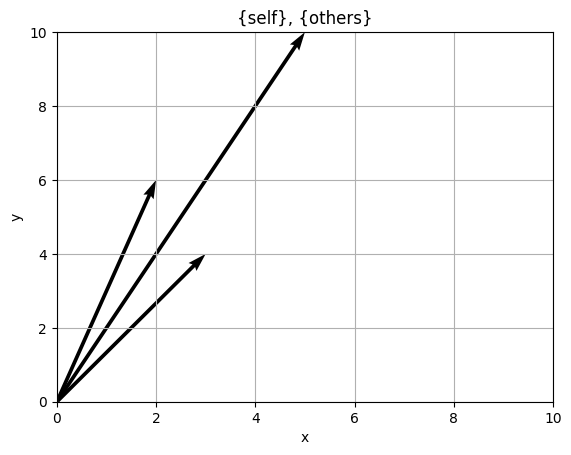

In [82]:
v2 = Vector(3,4)
v3= Vector(2,6)
v4= v2+v3

v4.plot(v2,v3)

In [69]:
5*v1

__rmul__ called
__mul__ called


Vector (5.0, 10.0, 15.0)